In [1]:
include("../library/utils.jl")
include("../library/equation.jl")
include("../library/integraton.jl")
include("../library/diffeq.jl")
using .Utils: truncate_to_decimal_places
using Plots
using LaTeXStrings

# Q1:

**Solve exp(−x) − x = 0 using fixed-point method, accurate up to 4 places in decimal.**

$$
e^{-x} -x = 0
$$

Solving the given equation is equivalent to solving this equation:
$$
x = e^{-x}
$$

according to the fixed point method, let our function $\phi(x)$ be:

$$
\phi(x) = e^{-x}
$$

**Note:** The used `Eqn.fixed_point_iteration` function can be found in the [equation.jl](../library/equation.jl) file.

In [2]:
# function phi(x)
#     return exp(-x)
# end

# ans = Eqn.fixed_point_iteration(phi, 1)
# print("Fixed point iteration: ")
# println(truncate_to_decimal_places(ans, 4))

# Q2

Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal

$$
\int_0^1 \sqrt{1+x^4} dx
$$

In [3]:
# function f(x)
# 	return sqrt(1 + x^4)
# end

# simp = Integration.simpson_rule(f, 0, 1, 4)
# print("Simpson's rule: ")
# println(truncate_to_decimal_places(simp, 6))

# gquad = Integration.gaussian_quadrature(f, 0, 1, 4)
# print("Gaussian quadrature: ")
# println(truncate_to_decimal_places(gquad, 6))
# # print()

# Q3
Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01

$$
\frac{dy}{dx} = \frac{5x^2 - y}{e^{x+y}}
$$

where $y(0) = 1$

Tabulate the results.

**Note:** I didn't understand what is meant by "Tabulate the results", so I just plotted the graph. Incase a $x_{final}$ had been mentioned, we could have printed the value of $y_{final}=f(x_{final})$ for each interval size. But since it wasn't mentioned, I just plotted the graph.

# Q4

Solve the heat equation $u_t= 4u_xx$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions:

$$u(0,t) = 0$$
$$u(8,t) = 0$$
$$u(x,0) = 4x −x^2/2$$

Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of $\alpha$ and inversion algorithm. Display the solution both in a table and a contour plot.

In [40]:
function heat_eq2(temp, alpha, Lx, Nx, Lt, Nt, needed)
    needed = Int(needed)
    ht = Lt / Nt
    println("ht: $ht")
    hx = Lx / Nx
    println("hx: $hx")
    alpha = ht * alpha / (hx^2)
    println("alpha: $alpha")

    if alpha > 0.5
        throw(ArgumentError("Stability condition: ht/hx^2 <= 0.5 not met"))
    end

    A = zeros(Float64, needed, Nx)

    for i in 1:Nx
        # println("i: ", i)
        A[1, i] = temp(i*hx)
    end

    for t in 2:needed
        for x in 1:Nx
            # println("t: ", t, " x: ", x)
            if x == 1
                A[t, x] = 0.0 + (1 - 2 * alpha) * A[t-1, x] + alpha * A[t-1, x+1]
            elseif x == Nx
                A[t, x] = alpha * A[t-1, x-1] + (1 - 2 * alpha) * A[t-1, x] + 0.0
            else
                A[t, x] = alpha * A[t-1, x-1] + (1 - 2 * alpha) * A[t-1, x] + alpha * A[t-1, x+1]
            end
        end
    end
    
    return A
end

function initial_condition(x)
	return 4*x - (x^2)/2
end

# function initial_condition(x)
#     # return 300 if x == 4 else 0
#     return x==4 ? 300 : 0
# end

L = 8
T = 1.0
alpha = 1
Nx = 100
Nt = 1000

A = heat_eq2(initial_condition, alpha, L, Nx, T, Nt, Nt*T*10)

ht: 0.001
hx: 0.08
alpha: 0.15625


10000×100 Matrix{Float64}:
 0.3168     0.6272    0.9312    1.2288    …  0.6272    0.3168    0.0
 0.3158     0.6262    0.9302    1.2278       0.6262    0.3158    0.0495
 0.314956   0.6252    0.9292    1.2268       0.6252    0.322691  0.083375
 0.31422    0.624224  0.9282    1.2258       0.625433  0.332565  0.107741
 0.313561   0.623282  0.927204  1.2248       0.62698   0.343197  0.126035
 0.312961   0.622376  0.926215  1.2238    …  0.629578  0.353606  0.140274
 0.312407   0.621505  0.925238  1.2228       0.632918  0.363394  0.151689
 0.31189    0.620667  0.924274  1.22181      0.636732  0.372428  0.161066
 0.311404   0.619859  0.923325  1.22082      0.640819  0.3807    0.168925
 0.310943   0.61908   0.922392  1.21983      0.64503   0.388254  0.17562
 ⋮                                        ⋱                      
 0.0564446  0.112834  0.169115  0.225232     0.169024  0.112774  0.0564142
 0.056436   0.112817  0.16909   0.225198     0.168999  0.112757  0.0564056
 0.0564275  0.1128    0.1

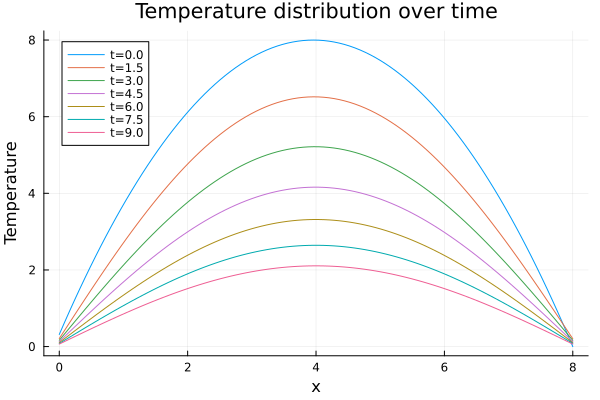

In [37]:
# shape of A

lines = range(1, Nt*10, step=1500)

x = range(0, L, length=Nx)
y = A[1, :]
plot(xlabel="x", ylabel="Temperature")
for i in lines
    plot!(x, A[i, :], label="t=$((i-1)/Nt)")
end
plot!(title="Temperature distribution over time", legend=:topleft)

# Q5

